In [54]:
import matplotlib.pyplot as plt
from birdseye.results import * 
import re


In [64]:
a = [1,2]
b = [4,5]
c = a.apply(lambda x: x)
print(c)

AttributeError: 'list' object has no attribute 'apply'

In [65]:
def collisions_plot(sensor, rewards): 
    mcts_runs = get_valid_runs('mcts')
    dqn_runs = get_valid_runs('dqn')
    mcts_config_filter = {'datetime_start': '2021-05-11T02:40:29', 'sensor':sensor }
    dqn_config_filter = {'datetime_start': '2021-05-27T22:55:22', 'sensor':sensor }
    filtered_dqn_runs = filter_runs('dqn', dqn_runs, dqn_config_filter)
    filtered_mcts_runs = filter_runs('mcts', mcts_runs, mcts_config_filter)


    fig = plt.figure(figsize=(20,30))
    #fig.tight_layout()
    fig.suptitle('Sensor: {}, Rewards: {}'.format(sensor, rewards))

    ax1 = plt.subplot(2,1,1)
    ax2 = plt.subplot(2,1,2)

    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        #print(config)
        data = get_data('mcts', r)

        # plot collisions

        collisions = data.get('collisions',None)
        lost = data.get('lost', None)
        if collisions is not None: 
            
            collisions = list(collisions.apply(lambda x: [float(xx) for xx in x[1:-1].split(',')]))
            lost = list(lost.apply(lambda x: [float(xx) for xx in x[1:-1].split(',')]))
            collisions = np.array(collisions)
            lost = np.array(lost)
            
            ax1.plot(np.mean(collisions+lost, axis=0),label='mcts: rew={}, tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)
# plot collisions
        collisions = data.get('collisions',None)
        lost = data.get('lost', None)
        if collisions is not None: 
            ##
            collisions = data['collisions'].iloc[-1]
            lost = data['lost'].iloc[-1]
            
            if type(collisions) != np.float64: 
            
                collisions = [float(xx) for xx in re.split(', |\s+', collisions.strip('[]\n')) if len(xx) > 0]
                lost = [float(xx) for xx in re.split(', |\s+', lost.strip('[]\n')) if len(xx) > 0]
                collisions = np.array(collisions)
                lost = np.array(lost)
                ax1.plot(collisions+lost, ':', label='dqn: rew={}, tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
        
    ax1.set_xlabel('time step')
    ax1.set_ylabel('collisions+lost')
    ax1.set_title('collisions+lost during single episode')
    
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True)
    
    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        data = get_data('mcts', r)
        plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        ax2.plot(np.mean(list(plot_data), axis=0), '-', label='mcts: rew={} tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)
        #plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        plot_data = data['reward'].iloc[-1]
        if type(plot_data) != np.float64: 
        #ax2.plot( np.mean(list(plot_data), axis=0), ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))

            plot_data = [float(xx) for xx in re.split(', |\s+', plot_data.strip('[]\n')) if len(xx) > 0]
            ax2.plot( plot_data, ':', label='dqn: rew={} tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    ax2.set_xlabel('time step')
    ax2.set_ylabel('reward')
    ax2.set_title('reward during single episode')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True)

    
    plt.subplots_adjust(
#                     left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
                    hspace=0.4)
    plt.show()

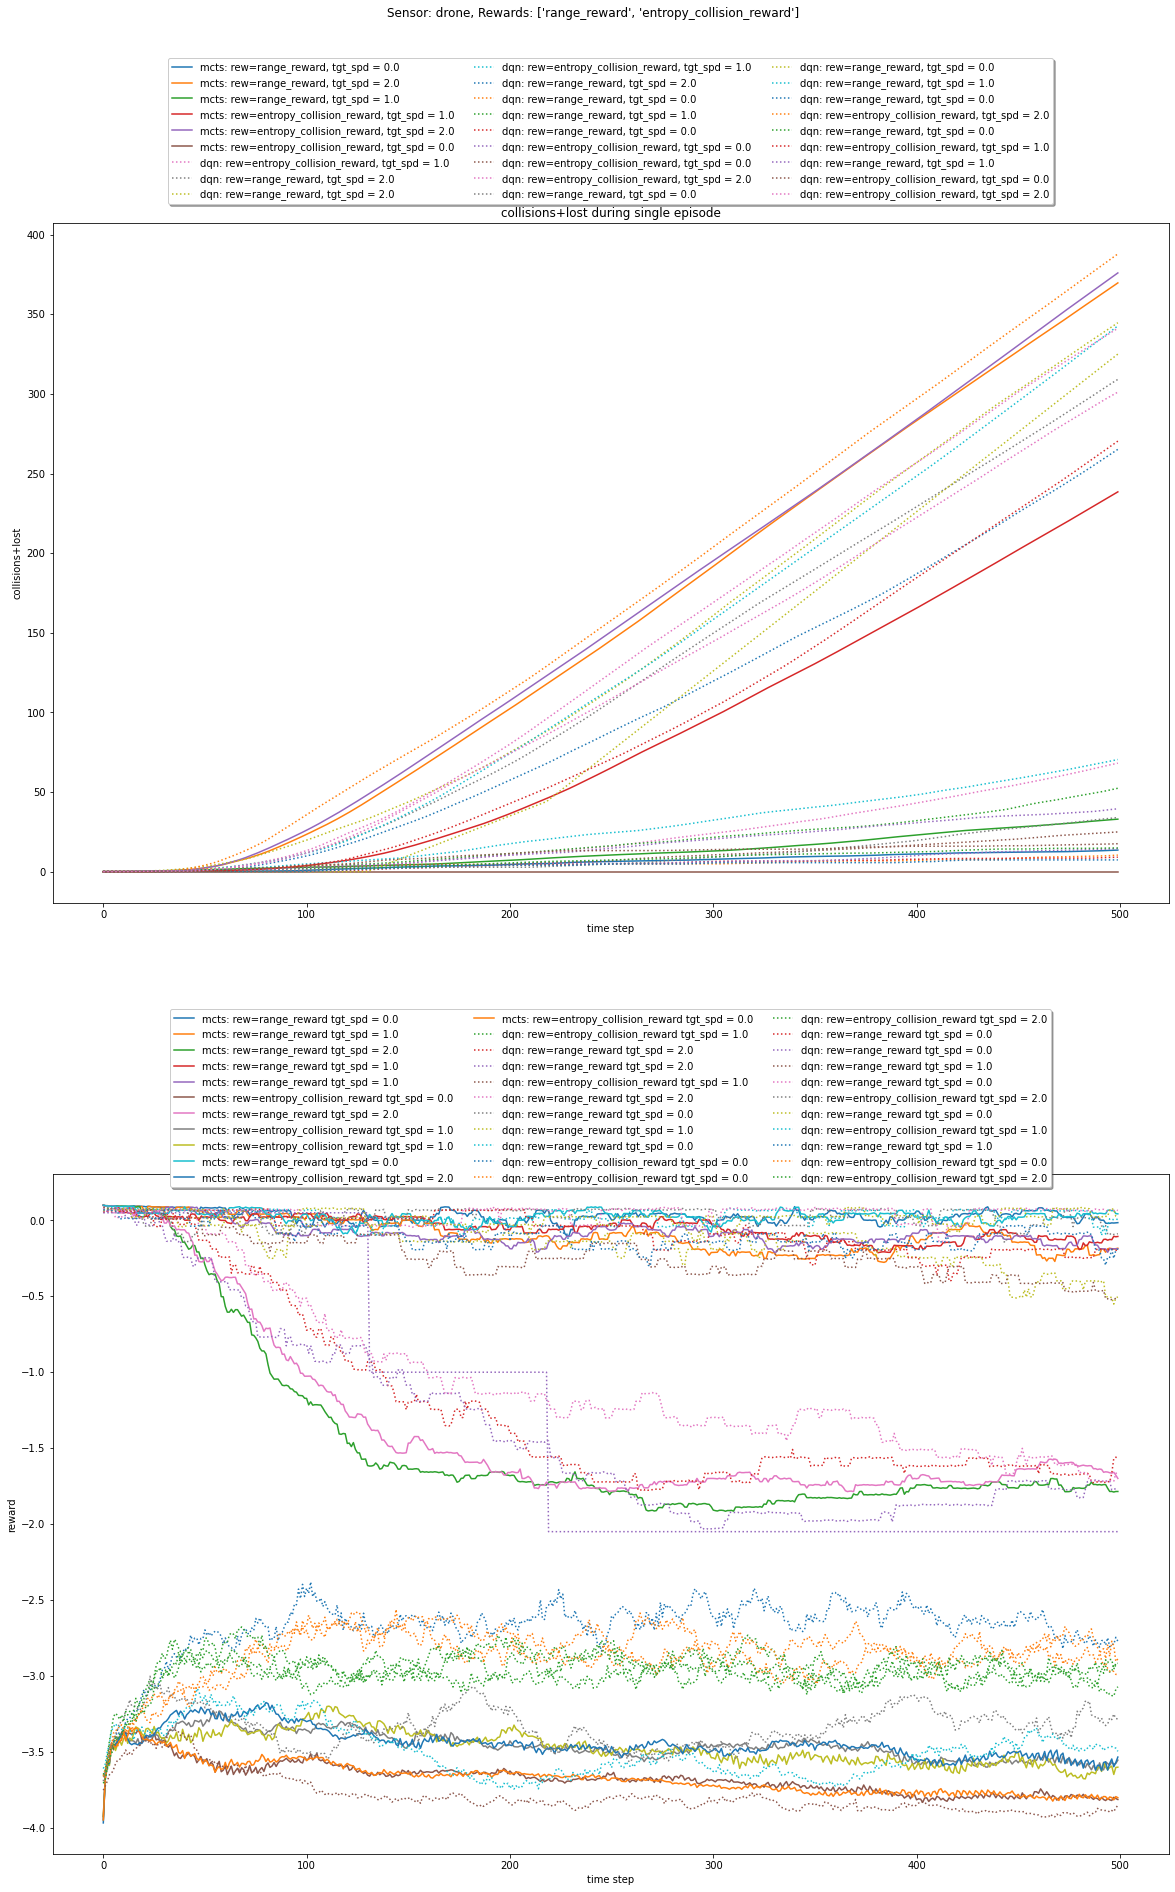

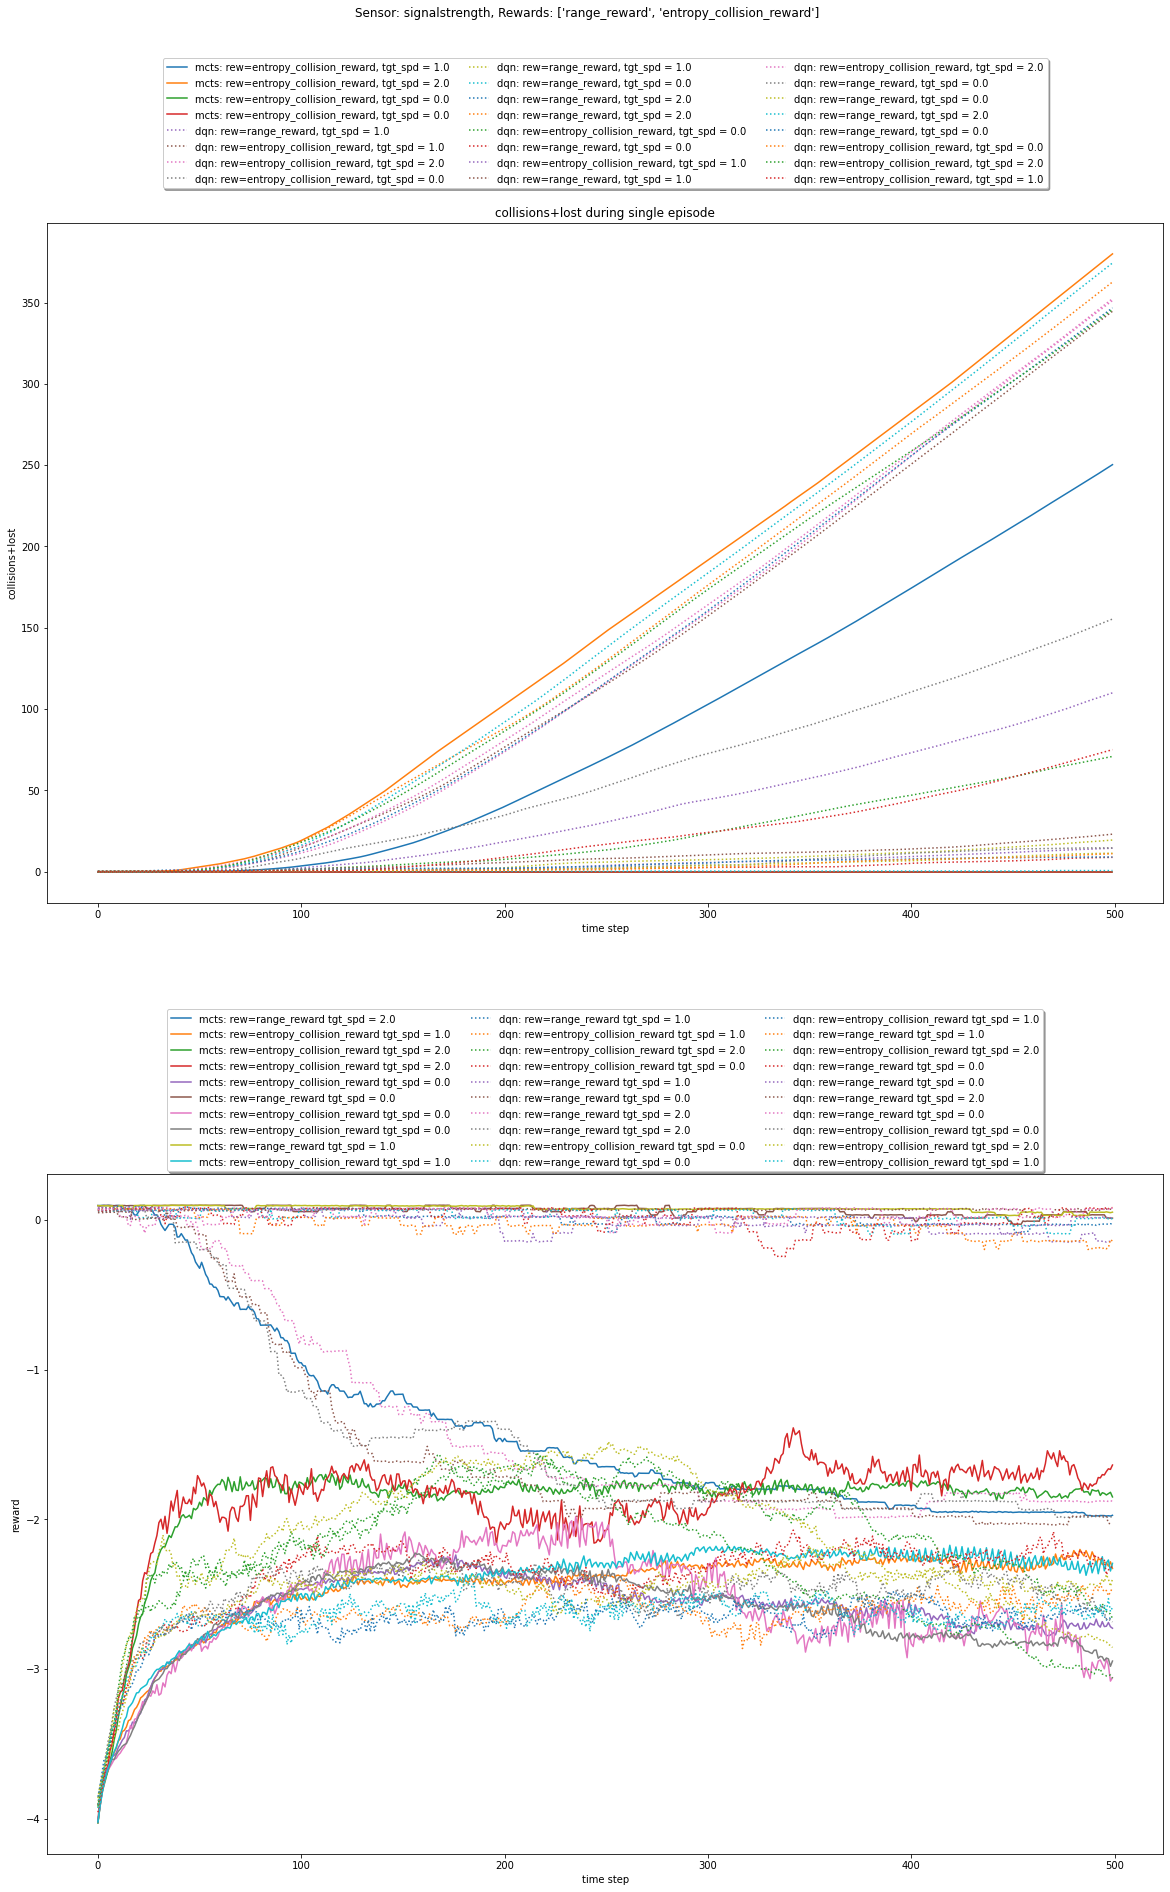

In [66]:
sensors = ['drone', 'signalstrength']
rewards = ['range_reward', 'entropy_collision_reward']

for s in sensors: 
    collisions_plot(s, rewards)

In [57]:
def sensor_plot(sensor, rewards): 
    mcts_runs = get_valid_runs('mcts')
    dqn_runs = get_valid_runs('dqn')
    mcts_config_filter = {'datetime_start': '2021-05-11T02:40:29', 'sensor':sensor }
    dqn_config_filter = {'datetime_start': '2021-05-27T22:55:22', 'sensor':sensor }
    filtered_dqn_runs = filter_runs('dqn', dqn_runs, dqn_config_filter)
    filtered_mcts_runs = filter_runs('mcts', mcts_runs, mcts_config_filter)


    fig = plt.figure(figsize=(20,30))
    #fig.tight_layout()
    fig.suptitle('Sensor: {}, Rewards: {}'.format(sensor, rewards))

    ax1 = plt.subplot(2,1,1)
    ax2 = plt.subplot(2,1,2)

    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        #print(config)
        data = get_data('mcts', r)
        plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        ax1.plot( np.mean(list(plot_data), axis=0), '-', label='mcts: rew={}, tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))

    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)

        #plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        #ax1.plot( np.mean(list(plot_data), axis=0), ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
        plot_data = data['centroid_err'].iloc[-1]

        if type(plot_data) != np.float64: 

            plot_data = [float(xx) for xx in re.split(', |\s+', plot_data.strip('[]\n'))]
            ax1.plot( plot_data, ':', label='dqn: rew={}, tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    ax1.set_xlabel('time step')
    ax1.set_ylabel('centroid distance')
    ax1.set_title('centroid distance during single episode')
    
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True)
    
    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        data = get_data('mcts', r)
        plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        ax2.plot(np.mean(list(plot_data), axis=0), '-', label='mcts: rew={} tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)
        #plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        plot_data = data['reward'].iloc[-1]
        if type(plot_data) != np.float64: 
        #ax2.plot( np.mean(list(plot_data), axis=0), ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))

            plot_data = [float(xx) for xx in re.split(', |\s+', plot_data.strip('[]\n')) if len(xx) > 0]
            ax2.plot( plot_data, ':', label='dqn: rew={} tgt_spd = {}'.format(config['Methods']['reward'], float(config['Methods']['target_speed'])))
    ax2.set_xlabel('time step')
    ax2.set_ylabel('reward')
    ax2.set_title('reward during single episode')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True)

    
    plt.subplots_adjust(
#                     left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
                    hspace=0.4)
    plt.show()

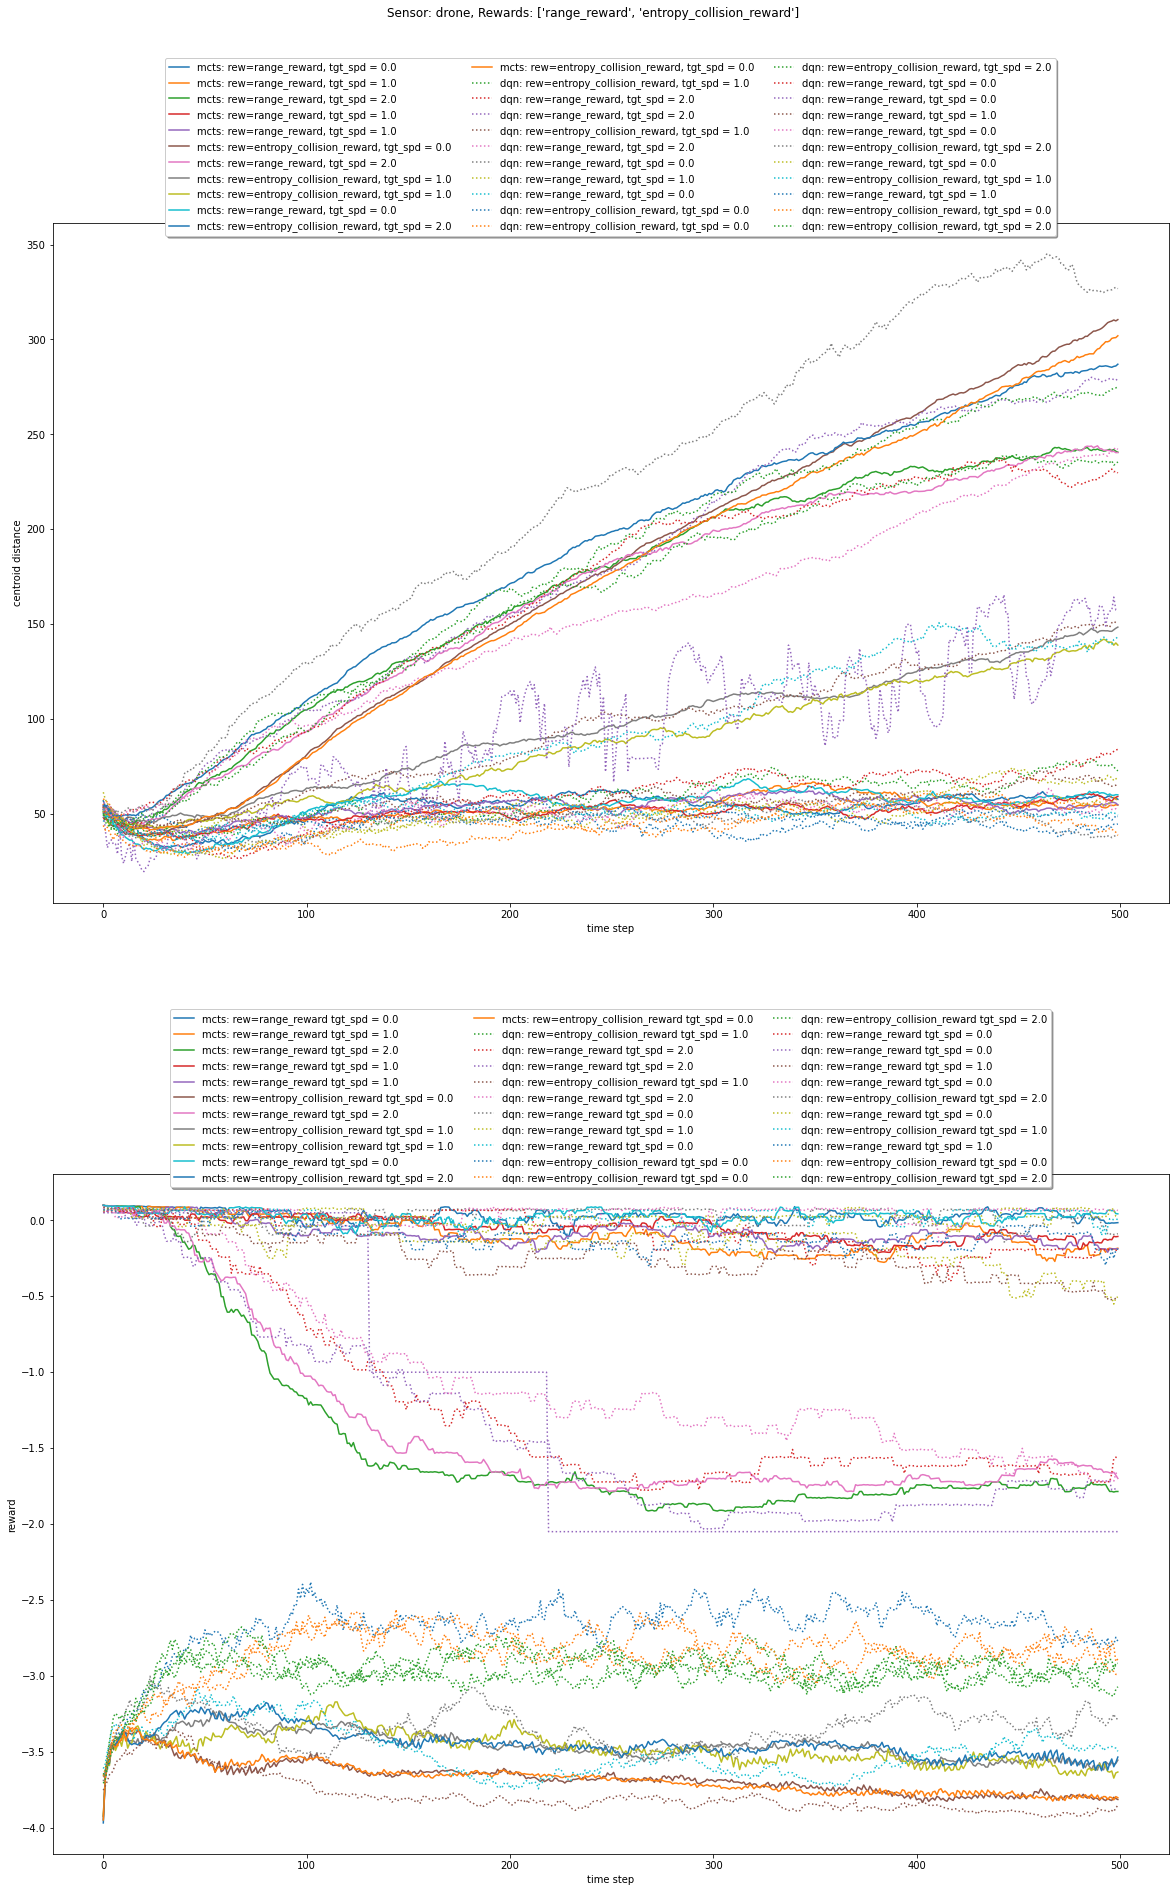

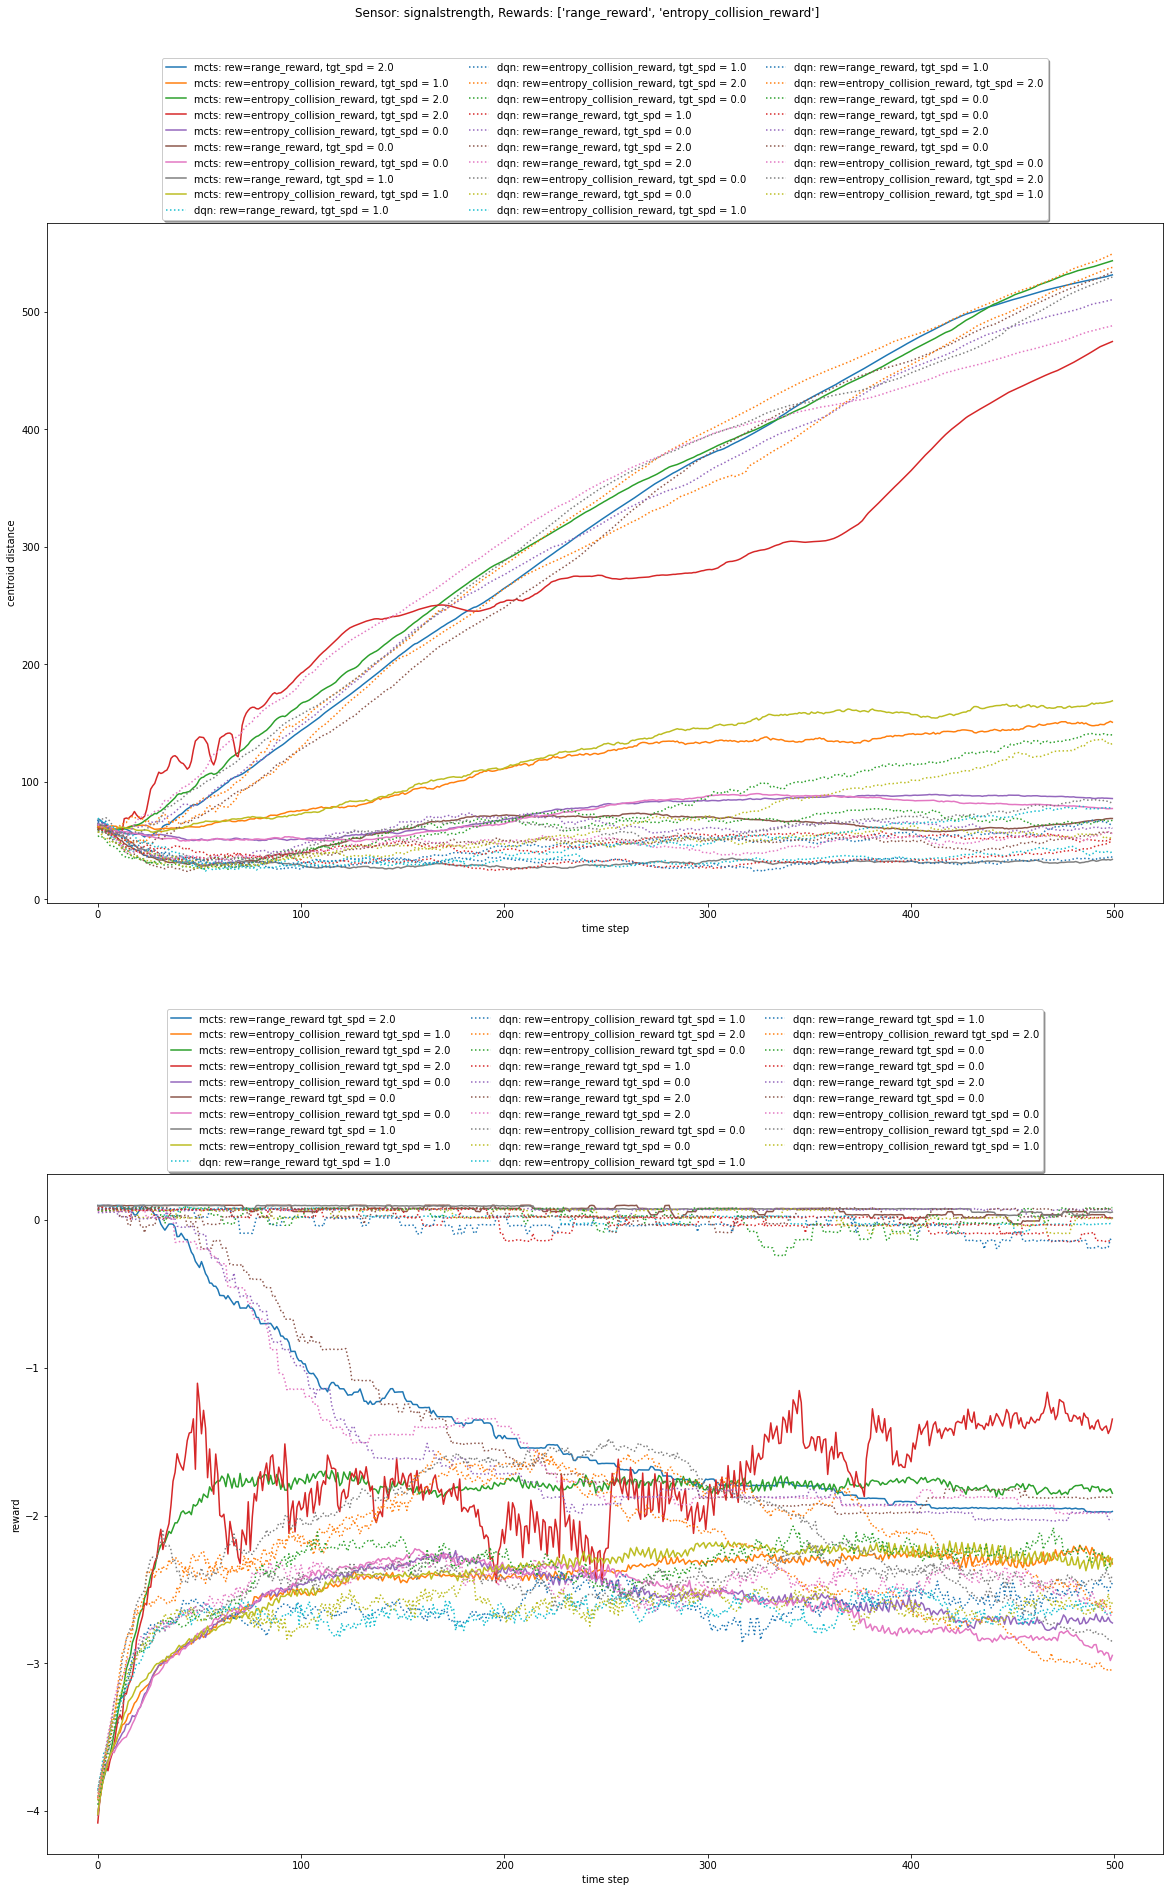

In [58]:
sensors = ['drone', 'signalstrength']
rewards = ['range_reward', 'entropy_collision_reward']

for s in sensors: 
    sensor_plot(s, rewards)

In [52]:

def custom_plot(reward, sensor): 
    mcts_runs = get_valid_runs('mcts')
    dqn_runs = get_valid_runs('dqn')
    mcts_config_filter = {'datetime_start': '2021-05-11T02:40:29', 'reward':reward, 'sensor':sensor }
    dqn_config_filter = {'datetime_start': '2021-05-27T22:55:22', 'reward':reward, 'sensor':sensor }
    filtered_dqn_runs = filter_runs('dqn', dqn_runs, dqn_config_filter)
    filtered_mcts_runs = filter_runs('mcts', mcts_runs, mcts_config_filter)


    fig = plt.figure(figsize=(20,8))
    fig.suptitle('Sensor Type: {}, Reward Type: {}'.format(sensor, reward))

    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        #print(config)
        data = get_data('mcts', r)
        print(data.keys())
        print(data.get('collisions','no collisions found'))
        plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        ax1.plot( np.mean(list(plot_data), axis=0), '-', label='mcts spd = {}'.format(float(config['Methods']['target_speed'])))

    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)

        #plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        #ax1.plot( np.mean(list(plot_data), axis=0), ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
        plot_data = data['centroid_err'].iloc[-1]

        if type(plot_data) != np.float64: 

            plot_data = [float(xx) for xx in re.split(', |\s+', plot_data.strip('[]\n'))]
            ax1.plot( plot_data, ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
    ax1.set_xlabel('time step')
    ax1.set_ylabel('centroid distance')
    ax1.set_title('centroid distance during single episode')
    ax1.legend()

    for r in filtered_mcts_runs: 
        config = get_config('mcts', r)
        data = get_data('mcts', r)
        plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        ax2.plot(np.mean(list(plot_data), axis=0), '-', label='mcts spd = {}'.format(float(config['Methods']['target_speed'])))
    for r in filtered_dqn_runs: 
        config = get_config('dqn', r)
        #print(config)
        data = get_data('dqn', r)
        #plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
        plot_data = data['reward'].iloc[-1]
        if type(plot_data) != np.float64: 
        #ax2.plot( np.mean(list(plot_data), axis=0), ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))

            plot_data = [float(xx) for xx in re.split(', |\s+', plot_data.strip('[]\n')) if len(xx) > 0]
            ax2.plot( plot_data, ':', label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
    ax2.set_xlabel('time step')
    ax2.set_ylabel('reward')
    ax2.set_title('reward during single episode')
    ax2.legend()


    plt.show()

Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'collisions', 'lost',
       'reward', 'r_err', 'theta_err', 'heading_err', 'centroid_err', 'rmse'],
      dtype='object')
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
95    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
96    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
97    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
98    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
99    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: collisions, Length: 100, dtype: object
Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err'

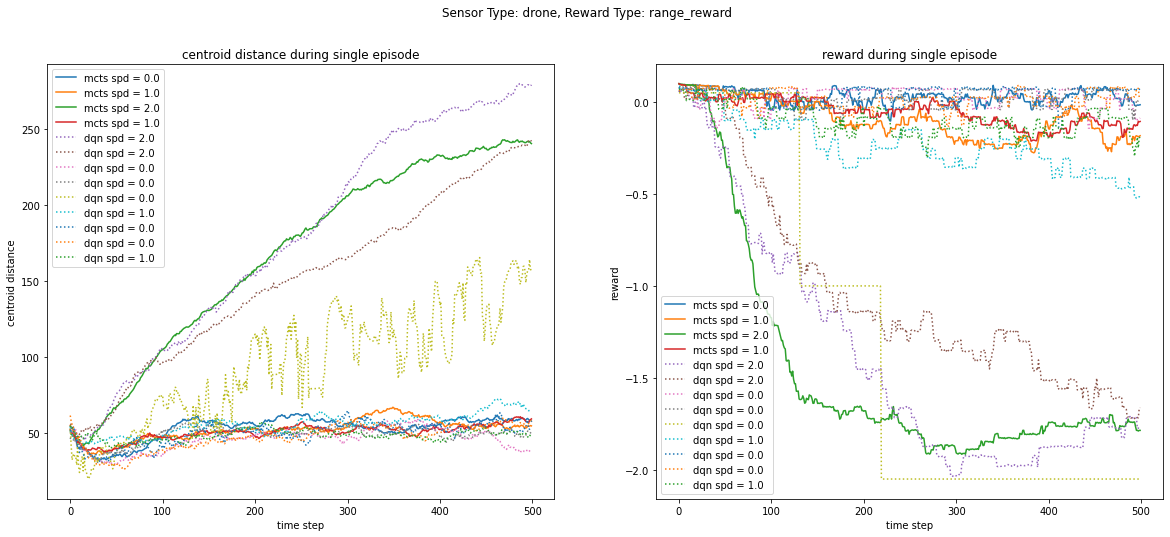

Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found
Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found
Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found


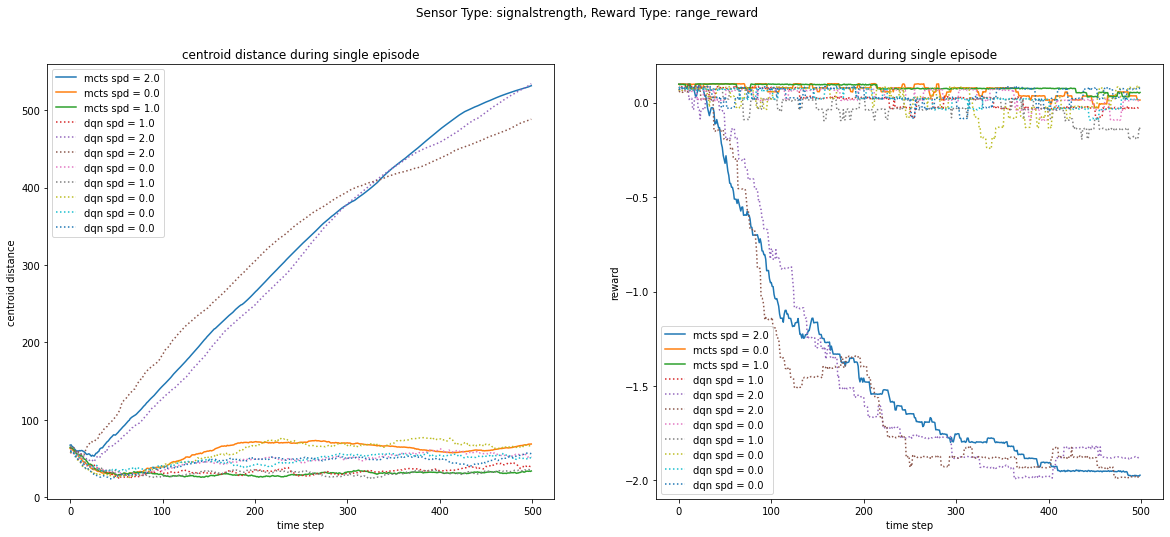

Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'collisions', 'lost',
       'reward', 'r_err', 'theta_err', 'heading_err', 'centroid_err', 'rmse'],
      dtype='object')
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

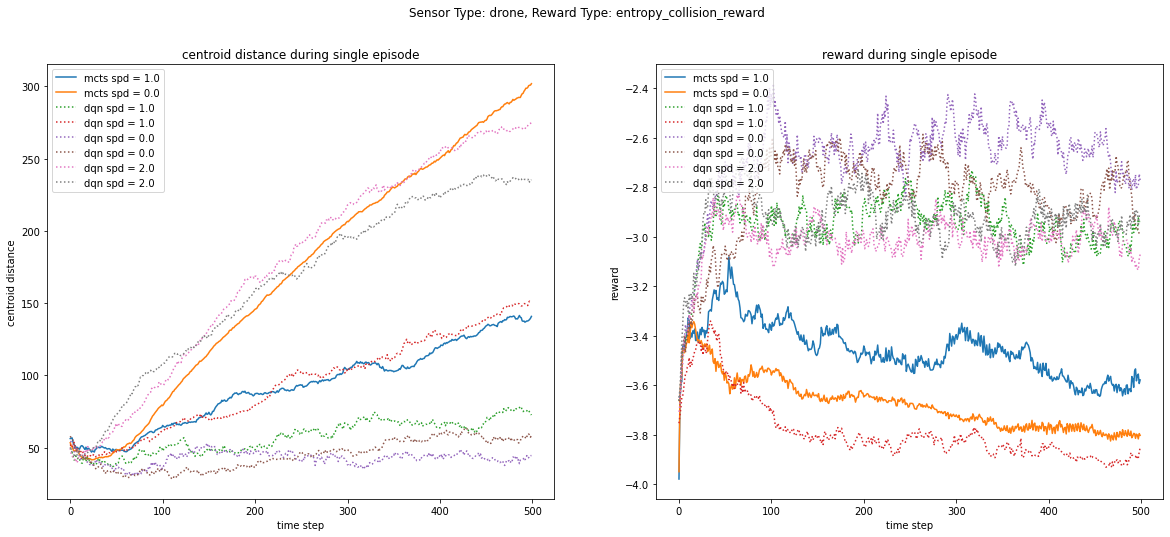

Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found
Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found
Index(['Unnamed: 0', 'time', 'run_time', 'total_reward', 'total_col',
       'total_lost', 'reward', 'r_err', 'theta_err', 'heading_err',
       'centroid_err', 'rmse'],
      dtype='object')
no collisions found


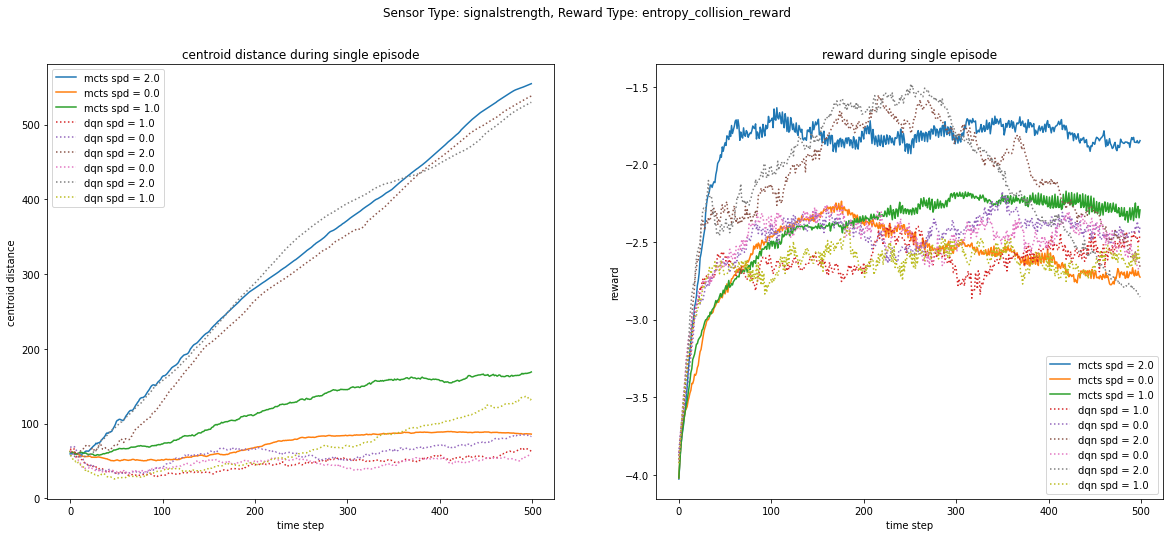

In [53]:

for reward in ['range_reward', 'entropy_collision_reward']: 
    for sensor in ['drone', 'signalstrength']: 
        custom_plot(reward, sensor)

In [ ]:
np.mean([[1,2,4],[2,3,4]], axis=0)

In [ ]:
mcts_runs = get_valid_runs('mcts')
dqn_runs = get_valid_runs('dqn')
config_filter = {'datetime_start': '2021-05-11T02:40:29' }
filtered_dqn_runs = filter_runs('dqn', dqn_runs, config_filter)
filtered_mcts_runs = filter_runs('mcts', mcts_runs, config_filter)

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    #print(config)
    data = get_data('mcts', r)
    plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
    plt.plot( np.mean(list(plot_data), axis=0), label='mcts spd = {}'.format(float(config['Methods']['target_speed'])))
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    #print(config)
    data = get_data('dqn', r)
    plot_data = data['centroid_err'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
    plt.plot( np.mean(list(plot_data), axis=0), label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.title('Centroid distance over episode')
plt.legend()
plt.show()

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    data = get_data('mcts', r)
    plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
    plt.plot(np.mean(list(plot_data), axis=0), label='mcts spd = {}'.format(float(config['Methods']['target_speed'])))
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    #print(config)
    data = get_data('dqn', r)
    plot_data = data['reward'].apply(lambda x: [float(xx) for xx in x[1:-1].split(',')])
    plt.plot( np.mean(list(plot_data), axis=0), label='dqn spd = {}'.format(float(config['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.title('Reward over episode')
plt.legend()
plt.show()

In [ ]:
filtered_dqn_runs

In [ ]:

mcts_runs = get_valid_runs('mcts')
#config_filter = {'target_speed':'0.0'}
config_filter = {'datetime_start': '2021-05-03T22:26:56' }
config_filter = {'sensor': 'signalstrength'}
filtered_mcts_runs = filter_runs('mcts', mcts_runs, config_filter)

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    #print(config)
    data = get_data('mcts', r)
    plt.plot( data['avg_centroid_err'], label=float(config['Methods']['target_speed']))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.show()

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    data = get_data('mcts', r)
    plt.plot(data['total_reward'], label=float(config['Methods']['target_speed']))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.show()

In [ ]:
mcts_logs = {}
for run in filtered_mcts_runs: 
    mcts_logs[run] = {
        'config': get_config('mcts', run), 
        'data': get_data('mcts', run)
    }

In [ ]:
mcts_logs.keys()

In [ ]:
[1]*10*np.mean([1,2])

In [ ]:
dqn_runs = get_valid_runs('dqn')
#config_filter = {'target_speed':'0.0'}
config_filter = {'datetime_start': '2021-05-03T22:26:56' }
config_filter = {'sensor': 'signalstrength'}
filtered_dqn_runs = filter_runs('dqn', dqn_runs, config_filter)
print(filtered_dqn_runs)

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['avg_centroid_err'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))

for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['avg_centroid_err'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.title('SignalStrength - centroid distance')
plt.show()

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['total_reward'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))
    
for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['total_reward'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.title('SignalStrength - reward')
plt.show()
#total_reward

In [ ]:

dqn_config_filter = {'sensor': 'drone', 'datetime_start': '2021-05-05T13:38:11', 'target_speed_range':None}
mcts_config_filter = {'sensor': 'drone', 'datetime_start': '2021-05-03T22:26:56', 'target_speed_range':None}


filtered_mcts_runs = filter_runs('mcts', mcts_runs, mcts_config_filter)
filtered_dqn_runs = filter_runs('dqn', dqn_runs, dqn_config_filter)

mcts_logs = {}
for run in filtered_mcts_runs: 
    mcts_logs[run] = {
        'config': get_config('mcts', run), 
        'data': get_data('mcts', run)
    }
dqn_logs = {}
for run in filtered_dqn_runs: 
    dqn_logs[run] = {
        'config': get_config('dqn', run), 
        'data': get_data('dqn', run)
    }
n_iter = None
plt.figure()
for run in dqn_logs: 
    if n_iter is None: 
        n_iter = dqn_logs[run]['data']['n_iter']
    plt.plot(dqn_logs[run]['data']['n_iter'], dqn_logs[run]['data']['avg_centroid_err'], label='dqn spd={}'.format(float(dqn_logs[run]['config']['Methods']['target_speed'])))

for run in mcts_logs: 
    plt.plot(n_iter, len(n_iter)*[np.mean(mcts_logs[run]['data']['avg_centroid_err'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.title('Drone - centroid distance')
plt.show()

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['total_reward'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))
    
for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['total_reward'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.title('Drone - reward')
plt.show()
#total_reward

In [ ]:
dqn_logs.keys()

In [ ]:
mcts_logs.keys()

In [ ]:
import pprint
pprinter = pprint.PrettyPrinter(indent=4)
for r in filtered_mcts_runs: 
    print(r)
    pprinter.pprint(get_config('mcts',r))

In [ ]:
import numpy as np 
x = []
for i in range(1000): 
    x.append(np.random.pareto(1))
plt.figure()
plt.hist(x, bins=100)
plt.show()

In [ ]:
a = np.random.rand(2,100)
H,_,_ = np.histogram2d(a[0,:], a[1,:])

In [ ]:
H

In [ ]:
np.sum(H)

In [ ]:
b = H/np.sum(H)

b += 0.0000001

In [ ]:
ent = - np.sum(b*np.log(b))
print(ent)

In [ ]:
b

In [ ]:
0.0001 * np.log(0.0001)

In [ ]:
x = [0.2, 0.2, 0.2, 0.2, 0.2]
#x = [0.1, 0.7, 0.1, 0.09, 0.01]
y = x * np.log(x)
print(-1.*np.sum(y))

In [ ]:
def ttt(a): 
    print(a)
ttt(a='b')

In [ ]:
run_data = [[3, [2,3,4,5]],[9, [1,2,3,4]]]
df = pd.DataFrame(run_data, columns=['time', 'vals'])

In [ ]:
df

In [ ]:
np.mean(list(df.vals),axis=0)

In [ ]:
df['avgs'] = np.mean(list(df.vals),axis=1)

In [ ]:
df[['vals']].mean(axis=1)

In [ ]:
for i in df.rows(): 
    print(i)

In [ ]:
'valasdfs' in df